# Midterm Project
## Lauren Bentley: bentleyle1@g.cofc.edu

### Step 1: Research Question



**Research Question:**

What combination of traits do dogs have that leads to the shortest time spent in shelters, and how do these traits vary based on location?


**Why does it matter?**

  My goal is to understand the desirable traits that help dogs find new homes quickly and determine whether these traits differ across various locations. Overpopulation is a critical issue in animal shelters, with many dogs facing long-term adoption times and potential euthanasia. By uncovering adoption trends, we can identify effective solutions to improve adoption rates for less desirable dogs. Undercovering hidden patterns with these trends may reveal whether dog transportation to different shelters would be viable to help rehome dogs sooner.

### Step 2: Data Acquisition

- **Dataset:** Dog Adoption
- **Data Source:** Kaggle
- **Citation**: WhenAmAnCodes. (n.d.). Dog Adoption [Dataset]. Kaggle. https://www.kaggle.com/datasets/whenamancodes/dog-adoption
- **Contents**:
  - AllDogDescriptions.csv
  - dogTravel.csv
  - movesByLocation.csv
- **Datasets used for project:**
  - AllDogDescriptions.csv
  - dogTravel.csv

### Step 3: Data Preparation and Cleaning

**Retrieve the data from Google Drive**

---

Imports:

In [1]:
# Import statements needed to retrieve and analyze data
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Access the Google Drive to retrieve data:

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


Store the dog description dataset and the dog location dataset in pandas dataframes:

In [3]:
# Read datasets from CSV using panda's read_csv() function
dog_descriptions = pd.read_csv("/content/drive/MyDrive/data101/dog_adoption_dataset/allDogDescriptions.csv")
dog_locations = pd.read_csv("/content/drive/MyDrive/data101/dog_adoption_dataset/dogTravel.csv");

**Data Exploration On Original Datasets**

---

1. Check the attributes of each dataset:

In [4]:
# Check the columns of the dog descriptions dataset
dog_descriptions.columns

Index(['index', 'id', 'org_id', 'url', 'type.x', 'species', 'breed_primary',
       'breed_secondary', 'breed_mixed', 'breed_unknown', 'color_primary',
       'color_secondary', 'color_tertiary', 'age', 'sex', 'size', 'coat',
       'fixed', 'house_trained', 'declawed', 'special_needs', 'shots_current',
       'env_children', 'env_dogs', 'env_cats', 'name', 'status', 'posted',
       'contact_city', 'contact_state', 'contact_zip', 'contact_country',
       'stateQ', 'accessed', 'type.y', 'description'],
      dtype='object')

In [5]:
# Check the columns of the dog locations dataset
dog_locations.columns

Index(['index', 'id', 'contact_city', 'contact_state', 'description', 'found',
       'manual', 'remove', 'still_there'],
      dtype='object')

2. Look at the first five rows for each to learn more about the data and how it is organized.

In [6]:
# First Five rows of dog transportations
dog_descriptions.head()

,index,id,org_id,url,type.x,species,breed_primary,breed_secondary,breed_mixed,breed_unknown,...,status,posted,contact_city,contact_state,contact_zip,contact_country,stateQ,accessed,type.y,description
0,0,46042150,NV163,https://www.petfinder.com/dog/harley-46042150/...,Dog,Dog,American Staffordshire Terrier,Mixed Breed,True,False,...,adoptable,2019-09-20T16:37:59+0000,Las Vegas,NV,89147,US,89009,2019-09-20,Dog,Harley is not sure how he wound up at shelter ...
1,1,46042002,NV163,https://www.petfinder.com/dog/biggie-46042002/...,Dog,Dog,Pit Bull Terrier,Mixed Breed,True,False,...,adoptable,2019-09-20T16:24:57+0000,Las Vegas,NV,89147,US,89009,2019-09-20,Dog,6 year old Biggie has lost his home and really...
2,2,46040898,NV99,https://www.petfinder.com/dog/ziggy-46040898/n...,Dog,Dog,Shepherd,NaN,False,False,...,adoptable,2019-09-20T14:10:11+0000,Mesquite,NV,89027,US,89009,2019-09-20,Dog,Approx 2 years old.\n Did I catch your eye? I ...
3,3,46039877,NV202,https://www.petfinder.com/dog/gypsy-46039877/n...,Dog,Dog,German Shepherd Dog,NaN,False,False,...,adoptable,2019-09-20T10:08:22+0000,Pahrump,NV,89048,US,89009,2019-09-20,Dog,NaN
4,4,46039306,NV184,https://www.petfinder.com/dog/theo-46039306/nv...,Dog,Dog,Dachshund,NaN,False,False,...,adoptable,2019-09-20T06:48:30+0000,Henderson,NV,89052,US,89009,2019-09-20,Dog,Theo is a friendly dachshund mix who gets alon...


We can see that we need to clean up NaN values in the "description" and "breed_secondary" attributes.

The dataset contains a lot of information about the dogs up for adoption. We only need information dealing with the dog's characteristics, dog's current location, dates, status, and descriptions.

The features dealing with organization id's, url to website, and "index" may be irrelevant. Additionally, there are reduntant attributes such as breed_unknown, type.x, and type.y sharing same values as "species". If all animals are dogs in the dataset, then "species" may also be redundant.

In [7]:
# First Five rows of dog locations
dog_locations.head()

,index,id,contact_city,contact_state,description,found,manual,remove,still_there
0,0,44520267,Anoka,MN,Boris is a handsome mini schnauzer who made hi...,Arkansas,NaN,NaN,NaN
1,1,44698509,Groveland,FL,Duke is an almost 2 year old Potcake from Abac...,Abacos,Bahamas,NaN,NaN
2,2,45983838,Adamstown,MD,Zac Woof-ron is a heartthrob movie star lookin...,Adam,Maryland,NaN,NaN
3,3,44475904,Saint Cloud,MN,~~Came in to the shelter as a transfer from an...,Adaptil,NaN,True,NaN
4,4,43877389,Pueblo,CO,Palang is such a sweetheart. She loves her peo...,Afghanistan,NaN,NaN,NaN


Comparing the dog locations with the dog descriptions dataset, there are redundant attributes such as "index", "id", "contact_city", "contact_state", and "description".

We may want to keep the "id" columns in both datasets to determine if they share the same values to prepare for the merging of datasets.

It has additional attributes that may be important such as "found" and "still_there". However, "still_there" is missing a lot of important information making it harder to derive important patterns to help understand the trends of adoption and dog transportation.

3. Determine the lengths of each dataset

In [8]:
# Get length of dog descriptions
len(dog_descriptions)

58180

In [9]:
len(dog_locations)

6194

4. Determine if the datasets contain overlapping data of dogs:

In [10]:
# Filter through the data in one dataset to determine if same data in other dataset
overlap = dog_descriptions[dog_descriptions["id"].isin(dog_locations["id"])]
print(len(overlap))

4115


Comparing the lengths of each dataset with the overlapping values, most of the data in the dog locations exists in the data descriptions dataset. However, there will be a lot of missing data dealing with locations on the merged dataset.

We need to determine whether we fill in those missing values, with the potential of biasing the data, or only use the overlapping data where a lot of the information will be lost.

5. Find the shape of each dataset

In [11]:
# What is the shape of the dog descriptions dataset?
dog_descriptions.shape

(58180, 36)

The dog descriptions dataset has 58,180 rows indicating 58,180 instances of dogs if there are no duplicates, and each dog has 36 attributes.

In [12]:
# What is the shape of the dog locations dataset?
dog_locations.shape

(6194, 9)

The dog locations dataset has 6,194 rows indicating 6,194 instances of dogs if there are no duplicates, and each dog has 9 attributes.

6. Determine if there are any duplicates of instances within each dataset

In [13]:
# Use the "id" attribute to determine if there are any duplicates in dog descriptions
dog_descriptions["id"].duplicated().sum()

0

There are no duplicates in the dog description dataset!

In [14]:
# Use the "id" attribute to determine if there are any duplicates in dog locations
dog_locations["id"].duplicated().sum()

2079

There are duplicates in the dog locations dataset. It looks like it is close to the difference of the overlapping values in the datasets.  

In [15]:
print(6194-2079)

4115


This means that all of the instances in the dog locations dataset exists in the dog descriptions dataset!

7. Determine if the attribute values are unique in each dataset:

In [16]:
# Determine unique values of dog descriptions
dog_descriptions.nunique()

,0
index,58180
id,58180
org_id,3969
url,58180
type.x,1
species,1
breed_primary,216
breed_secondary,190
breed_mixed,2
breed_unknown,1


The values we are wanting to look at:

- species: Are there only dogs in this dataset?

- age: What does the dog age range from?

- sex: What is the 3rd value?

- size: What does the dog size range from?

- status: What are the different status of the dog adoption?

- contact_state: Is this redundant with stateQ?

- stateQ: Is this redundant with contact_state?

- accessed: Why is there only one value for the date?

- posted: Not listed but how does it compare to accessed?

Additionally, the declaw attribute has 0 values. This column will need to be deleted.

In [17]:
# Determine unique values of dog locations
dog_locations.nunique()

,0
index,6194
id,4115
contact_city,635
contact_state,45
description,3926
found,608
manual,66
remove,1
still_there,1


The values we are wanting to look at:

- contact_state: Does it consists of only US?

- manual: What does the values say about the attribute?

- remove: What is the only one value?

- still_there: Why is there only one binary value?

8. Check the values of the attributes in each dataset

In [18]:
# Check the species attribute in the dog descriptions datasey
dog_descriptions["species"].value_counts()

,count
species,
Dog,58180


All of the values of the species attribute is "Dog". Thus, we can delete this column due to the lack of useful information.

In [19]:
# Check the age attribute in the dog descriptions dataset
dog_descriptions["age"].value_counts()

,count
age,
Adult,27955
Young,16194
Baby,9397
Senior,4634


The dogs' ages are divided into 4 bins: baby, young, adult, and senior.

In [20]:
# Check the sex attribute in the dog descriptions dataset
dog_descriptions["sex"].value_counts()

,count
sex,
Male,30294
Female,27883
Unknown,3


The third value of sex is unknown - we do not know if the dog was male or female.

In [21]:
# Check the size attribute in the dog descriptions dataset
dog_descriptions["size"].value_counts()

,count
size,
Medium,29908
Large,15761
Small,11580
Extra Large,931


The dog's sizes are divided into 4 bins: small, medium, large, and extra large.

In [22]:
# Check the status attribute in the dog descriptions dataset
dog_descriptions["status"].value_counts()

,count
status,
adoptable,58147
2017-06-16T18:44:33+0000,1
2019-07-25T19:53:21+0000,1
2015-06-29T23:58:09+0000,1
2015-02-07T13:06:43+0000,1
2019-09-20T01:50:51+0000,1
2019-02-18T12:02:48+0000,1
2013-10-10T13:57:39+0000,1
2015-12-25T12:28:30+0000,1


Majority of the dogs are up for the adoption. I am assuming that the timeseries data are the dates the dogs were adopted. Next step will be to check the attribute's data types.

In [23]:
# Check the contact_state attribute in the dog descriptions dataset
dog_descriptions["contact_state"].value_counts()

,count
contact_state,
NY,4002
GA,3479
VA,3058
NJ,3022
PA,2821
...,...
19053,1
46158,1
47131,1


We have inconsistent data types within the contact_state attribute - some are possibly zip codes? May need to delete or use only zip codes.

In [24]:
# Check the stateQ attribute in the dog descriptions dataset
dog_descriptions["stateQ"].value_counts()

,count
stateQ,
CT,6725
DC,4665
GA,3439
NC,3085
FL,2659
...,...
89408,8
89801,5
89027,2


The values tend to differ yet share same inconsistencies in data types as contact_state.

In [25]:
# Check the accessed attribute in the dog descriptions dataset
dog_descriptions["accessed"].value_counts()

,count
accessed,
2019-09-20,58147


There is only one timeseries value for accessed attribute. This does not add any useful information, so attribute will need to be deleted.

In [26]:
# Check the posted attribute in the dog descriptions dataset
dog_descriptions["posted"].value_counts()

,count
posted,
2019-08-31T10:01:48+0000,121
2019-08-31T10:46:47+0000,83
2019-07-31T17:35:08+0000,68
2019-07-31T17:27:28+0000,63
2019-08-31T10:40:37+0000,61
...,...
2019-09-18T14:06:33+0000,1
2019-09-18T14:03:35+0000,1
2019-09-18T13:53:33+0000,1


In [27]:
dog_descriptions['posted'] = pd.to_datetime(dog_descriptions['posted'], format='%Y-%m-%dT%H:%M:%S%z', utc=True, errors='coerce')

The posted attribute seems to be the dates that the dog was posted for adoption. This information is helpful due to giving insight on how long the dog was potentially up for adoption!

In [28]:
# Check the contact_state attribute in the dog locations dataset
dog_locations["contact_state"].value_counts()

,count
contact_state,
VA,1025
WA,634
NJ,552
NY,490
MD,379
ME,361
PA,316
MN,190
NC,187


Besides one state where it is a zip code, they are mostly consistent state abbreviations within the United States. This tells me a great way to clean the data is to perform an inner merge meaning only keep the overlapping instances in the dataset.

To be safe, I want to keep this attribute and disregard the dog description's contact_state attribute due to the more reliable values.

In [29]:
# Check the manual attribute in the dog locations dataset
dog_locations["manual"].value_counts()

,count
manual,
Texas,356
South Korea,187
North Carolina,175
Virginia,157
California,149
...,...
St. Maarten,1
St. Simon,1
Azerbaijan,1


This list different countries and states in the United States. It is safe to assume this attribute contains information of where the dog was found prior to transportation.

In [30]:
# Check the remove attribute in the dog locations dataset
dog_locations["remove"].value_counts()

,count
remove,
True,1738


In [31]:
# Check the still_there attribute in the dog locations dataset
dog_locations["still_there"].value_counts()

,count
still_there,
True,319


In both of the remove attribute and still_there attribute, there is minimal values that are not missing and only indicate true. We may assume all other values are false.

9. Compare the vague attributes in dog locations dataset to see if there are redundant information.

In [32]:
comp_attr = ["found", "manual", "remove", "contact_state", "still_there"] # List desired attributes to compare
dog_locations_comp = dog_locations.loc[:, comp_attr]    # Create new dataframe of desired attributes
dog_locations_comp.head() # Compare first five rows to find any hidden patterns to find missing context

,found,manual,remove,contact_state,still_there
0,Arkansas,NaN,NaN,MN,NaN
1,Abacos,Bahamas,NaN,FL,NaN
2,Adam,Maryland,NaN,MD,NaN
3,Adaptil,NaN,True,MN,NaN
4,Afghanistan,NaN,NaN,CO,NaN


It seems that found will contain the city or island if the manual has the state or country. If the found column has the state or country, then there is a missing place.

I think the only attributes neede is found and contact_state.

We cannot assume that the missing values in remove is false due to lack of contaxt.

10. Check the data types of the attributes in each dataset

In [33]:
# Check the data types of attributes in dog descriptions dataset
dog_descriptions.dtypes

,0
index,int64
id,int64
org_id,object
url,object
type.x,object
species,object
breed_primary,object
breed_secondary,object
breed_mixed,bool
breed_unknown,bool


Attribute(s) that contain object types need to be converted to String:

- breed_primary

- breed_secondary

- color_primary

- color_secondary

- age

- sex

- size

- coat

- status

- contact_country

- description

- posted

Attribute(s) that contain object types need to be converted to booleans:

- env_children

- env_dogs

- env_cats

Attribute(s) that contain object types need to be converted to int:

- contact_zip

Attribute(s) that contain object types need to be converted to time series:

- posted

In [34]:
# Check the data types of attributes in dog locations dataset
dog_locations.dtypes

,0
index,int64
id,int64
contact_city,object
contact_state,object
description,object
found,object
manual,object
remove,object
still_there,object


Attribute(s) that contain object types need to be converted to String:

- contact_city

- contact_state

- found

- descriptions

Attribute(s) that contain object types need to be converted to boolean:

- still_there

11. Determine the number of missing values in each dataset

In [35]:
# Retrieve the number of null values in dog descriptions dataset
dog_descriptions.isnull().sum()

,0
index,0
id,0
org_id,0
url,0
type.x,0
species,0
breed_primary,0
breed_secondary,37359
breed_mixed,0
breed_unknown,0


There are missing values of contact_zip and thinking about it, we already have multiple data indicating the location of the dog and it is not needed.

In [36]:
# Retrieve the number of null values in dog locations dataset
dog_locations.isnull().sum()

,0
index,0
id,0
contact_city,0
contact_state,0
description,0
found,0
manual,4047
remove,4456
still_there,5875


There is no missing values in the description attribute in the dog locations dataset furthering the inner merge as the best option.

12. Get information on each dataset

In [37]:
# Retrieve information on dog descriptions
dog_descriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58180 entries, 0 to 58179
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   index            58180 non-null  int64              
 1   id               58180 non-null  int64              
 2   org_id           58180 non-null  object             
 3   url              58180 non-null  object             
 4   type.x           58180 non-null  object             
 5   species          58180 non-null  object             
 6   breed_primary    58180 non-null  object             
 7   breed_secondary  20821 non-null  object             
 8   breed_mixed      58180 non-null  bool               
 9   breed_unknown    58180 non-null  bool               
 10  color_primary    26134 non-null  object             
 11  color_secondary  12059 non-null  object             
 12  color_tertiary   1217 non-null   object             
 13  age             

In [38]:
# Retrieve information on dog locations
dog_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          6194 non-null   int64 
 1   id             6194 non-null   int64 
 2   contact_city   6194 non-null   object
 3   contact_state  6194 non-null   object
 4   description    6194 non-null   object
 5   found          6194 non-null   object
 6   manual         2147 non-null   object
 7   remove         1738 non-null   object
 8   still_there    319 non-null    object
dtypes: int64(2), object(7)
memory usage: 435.6+ KB


The information summary on both datasets reiterates what we have done in previous data exploration techniques. It gives us the total non-null values and reiterate the data types for each column.

13. Describe each of the datasets

In [39]:
# Describe the dog descriptions dataset
dog_descriptions.describe()

,index,id,declawed
count,58180.000000,5.818000e+04,0.0
mean,29089.500000,4.425148e+07,NaN
std,16795.263668,3.818970e+06,NaN
min,0.000000,6.041150e+05,NaN
25%,14544.750000,4.451688e+07,NaN
50%,29089.500000,4.559662e+07,NaN
75%,43634.250000,4.591667e+07,NaN
max,58179.000000,4.604315e+07,NaN


In [40]:
# Describe the dog locations dataset
dog_locations.describe()

,index,id
count,6194.000000,6.194000e+03
mean,3096.500000,4.478628e+07
std,1788.198115,2.932145e+06
min,0.000000,8.619716e+06
25%,1548.250000,4.494010e+07
50%,3096.500000,4.573499e+07
75%,4644.750000,4.592318e+07
max,6193.000000,4.604315e+07


Majority of the attributes are categorical, so this only takes account of the index and id attributes in each dataset. This does not provide helpful information.

**Clean Each of the datasets**

---

1. Delete the irrelevant columns in each dataset we found irrelevant through the initial data exploration process.

In [41]:
# Remove redundant columns from dog descriptions (species, type.x, type.y, contact_zip, stateQ)
# and irrelevant columns (index, url, org_id, declawed, accessed, and name)

dog_des_deletions = ["index", "url", "org_id", "species", "type.x", "type.y", "stateQ", "name", "color_tertiary", "declawed", "accessed", "breed_unknown", "contact_zip"]
dog_descriptions = dog_descriptions.drop(columns=dog_des_deletions)

In [42]:
# Ensure that the deletion of irrelevant columns was successful
dog_descriptions.columns

Index(['id', 'breed_primary', 'breed_secondary', 'breed_mixed',
       'color_primary', 'color_secondary', 'age', 'sex', 'size', 'coat',
       'fixed', 'house_trained', 'special_needs', 'shots_current',
       'env_children', 'env_dogs', 'env_cats', 'status', 'posted',
       'contact_city', 'contact_state', 'contact_country', 'description'],
      dtype='object')

In [43]:
# Remove redundant columns from dog locations
dog_loc_deletions = ["index", "manual", "remove"]
dog_locations = dog_locations.drop(columns=dog_loc_deletions)

In [44]:
# Ensure that the deletion of irrelevant columns was successful
dog_locations.columns

Index(['id', 'contact_city', 'contact_state', 'description', 'found',
       'still_there'],
      dtype='object')

2. Removes the duplicates in each dataset

In [45]:
# Remove the duplicates in the dog locations set
dog_locations.drop_duplicates(subset="id", keep="first", inplace=True)

In [46]:
# Ensure that the duplicates are removed
dog_locations.duplicated().sum()

0

3. Fill in or remove the missing values of each dataset

In [47]:
# Fix the missing values in the dog descriptions dataset
threshold = len(dog_descriptions) * 0.05  # Set the threshold to 5% of dataset
cols_drop = dog_descriptions.columns[dog_descriptions.isna().sum() > threshold] # if more than threshold,
dog_descriptions.drop(columns=cols_drop, inplace=True)    # remove columns

In [48]:
# Double check that all missing values are gone
dog_descriptions.isnull().sum()

,0
id,0
breed_primary,0
breed_mixed,0
age,0
sex,0
size,0
fixed,0
house_trained,0
special_needs,0
shots_current,0


In [49]:
# Fix the missing values in the dog descriptions dataset
threshold = len(dog_locations) * 0.05
cols_drop = dog_locations.columns[dog_locations.isna().sum() > threshold]
dog_locations.drop(columns=cols_drop, inplace=True)

In [50]:
# Double check that all missing values are gone
dog_locations.isnull().sum()

,0
id,0
contact_city,0
contact_state,0
description,0
found,0


All of this missing values exceeded the threshold in each dataset. Thus, they were deleted and no need to fill in missing values!

4. Now that there is no missing values, we can convert the data types of the attributes containing object values

In [51]:
# Convert object data types in dog description dataset
  # Convert object columns to strings
obj_str = ["breed_primary", "age", "sex", "size", "status",
           "contact_city", "contact_state", "contact_country"]
dog_descriptions[obj_str] = dog_descriptions[obj_str].astype('string')

  # convert object column accessed to timeseries data type
dog_descriptions['posted'] = pd.to_datetime(dog_descriptions['posted'],
                                            format="%Y-%m-%dT%H:%M:%S%z", # Correct time series format
                                            utc=True,
                                            errors='coerce')

In [52]:
# Ensure all attributes are no longer storing object types
dog_descriptions.dtypes

,0
id,int64
breed_primary,string[python]
breed_mixed,bool
age,string[python]
sex,string[python]
size,string[python]
fixed,bool
house_trained,bool
special_needs,bool
shots_current,bool


In [53]:
# Convert multiple columns to string in dogs location dataset
dog_loc_str = ['contact_city', 'contact_state', 'description', 'found']
dog_locations[dog_loc_str] = dog_locations[dog_loc_str].astype('string')

In [54]:
# Ensure all attributes are no longer storing object types
dog_locations.dtypes

,0
id,int64
contact_city,string[python]
contact_state,string[python]
description,string[python]
found,string[python]



5. Ensure the column names is consistent prior to merge

In [55]:
# Lower case and strip the column names in dog descriptions
dog_descriptions.columns = dog_descriptions.columns.str.lower().str.strip()
print(dog_descriptions.columns)

Index(['id', 'breed_primary', 'breed_mixed', 'age', 'sex', 'size', 'fixed',
       'house_trained', 'special_needs', 'shots_current', 'status', 'posted',
       'contact_city', 'contact_state', 'contact_country'],
      dtype='object')


In [56]:
# Lower case and strip the column names in dog locations
dog_locations.columns = dog_locations.columns.str.lower().str.strip()
print(dog_locations.columns)

Index(['id', 'contact_city', 'contact_state', 'description', 'found'], dtype='object')


6. Perform an inner merge on both datasets

In [57]:
# Now inner merge both sets to create a dataset of only overlapping data
merged_df = pd.merge(dog_descriptions, dog_locations, on="id", how="inner", suffixes=("_desc", "_loc"))

7. Review the first five rows of the newly merged dataset

In [58]:
# check first five columns of the newly added df
merged_df.head()

,id,breed_primary,breed_mixed,age,sex,size,fixed,house_trained,special_needs,shots_current,status,posted,contact_city_desc,contact_state_desc,contact_country,contact_city_loc,contact_state_loc,description,found
0,45923603,German Shepherd Dog,True,Baby,Male,Medium,False,False,False,False,adoptable,2019-09-10 04:52:53+00:00,Las Vegas,NV,US,Las Vegas,NV,Meet Blair. Blair was confiscated from a hoard...,Arizona
1,45923600,German Shepherd Dog,True,Baby,Male,Medium,False,False,False,False,adoptable,2019-09-10 04:48:21+00:00,Las Vegas,NV,US,Las Vegas,NV,Handsome Duane was confiscated from part of a ...,Arizona
2,45289127,Beagle,False,Adult,Male,Medium,True,False,False,False,adoptable,2019-07-18 12:05:39+00:00,Las Vegas,NV,US,Las Vegas,NV,Mustard was part of a pair. He came in with Br...,Las Vegas
3,44801851,Boxer,True,Young,Male,Large,True,False,False,True,adoptable,2019-05-26 11:34:44+00:00,Las Vegas,NV,US,Las Vegas,NV,Our Max.... This boy has been through a lot an...,Puerto Rico
4,44731850,Maltese,True,Young,Female,Small,False,False,False,True,adoptable,2019-05-19 02:54:13+00:00,Las Vegas,NV,US,Las Vegas,NV,Meet Forever . This adorable girl is a 1 1/2 y...,Las Vegas


8. Remove the redundant rows of contact_state and contact_city

In [59]:
# Drop the redundant columns
dup_columns = ["contact_city_loc", "contact_state_loc"]
merged_df.drop(columns=dup_columns, inplace=True)

In [60]:
# Ensure the redundant columns are dropped
merged_df.columns

Index(['id', 'breed_primary', 'breed_mixed', 'age', 'sex', 'size', 'fixed',
       'house_trained', 'special_needs', 'shots_current', 'status', 'posted',
       'contact_city_desc', 'contact_state_desc', 'contact_country',
       'description', 'found'],
      dtype='object')

9. Rename the columns for my own aesthetic needs

In [61]:
# Rename columns
merged_df.rename(columns={"contact_city_desc": "contact_city", "contact_state_desc": "contact_state"}, inplace=True)

In [62]:
# Ensure columns were renamed
merged_df.columns

Index(['id', 'breed_primary', 'breed_mixed', 'age', 'sex', 'size', 'fixed',
       'house_trained', 'special_needs', 'shots_current', 'status', 'posted',
       'contact_city', 'contact_state', 'contact_country', 'description',
       'found'],
      dtype='object')

10. Lets engineer a new feature of binary values which indicate whether a dog has been transported by comparing values stored in the contact_state and found attributes

In [63]:
# Compare the values stored in found and contact_state, and create a new attribute
merged_df["transported"] = merged_df["found"] != merged_df["contact_city"]


In [64]:
# Ensure that feature engineering was correctly implemented
merged_df.head()

,id,breed_primary,breed_mixed,age,sex,size,fixed,house_trained,special_needs,shots_current,status,posted,contact_city,contact_state,contact_country,description,found,transported
0,45923603,German Shepherd Dog,True,Baby,Male,Medium,False,False,False,False,adoptable,2019-09-10 04:52:53+00:00,Las Vegas,NV,US,Meet Blair. Blair was confiscated from a hoard...,Arizona,True
1,45923600,German Shepherd Dog,True,Baby,Male,Medium,False,False,False,False,adoptable,2019-09-10 04:48:21+00:00,Las Vegas,NV,US,Handsome Duane was confiscated from part of a ...,Arizona,True
2,45289127,Beagle,False,Adult,Male,Medium,True,False,False,False,adoptable,2019-07-18 12:05:39+00:00,Las Vegas,NV,US,Mustard was part of a pair. He came in with Br...,Las Vegas,False
3,44801851,Boxer,True,Young,Male,Large,True,False,False,True,adoptable,2019-05-26 11:34:44+00:00,Las Vegas,NV,US,Our Max.... This boy has been through a lot an...,Puerto Rico,True
4,44731850,Maltese,True,Young,Female,Small,False,False,False,True,adoptable,2019-05-19 02:54:13+00:00,Las Vegas,NV,US,Meet Forever . This adorable girl is a 1 1/2 y...,Las Vegas,False


11. Clean the "status" and "contact_state" attribute

 remembered that there were few timeseries data in the "status" attribute that needed to be cleaned. Lets review the different values:

In [65]:
# Review attribute values of status
merged_df["status"].value_counts()

,count
status,
adoptable,4112
2016-12-15T13:33:43+0000,1
2015-09-07T12:57:27+0000,1
2019-07-25T19:53:21+0000,1


The data is heavily skewed with only 3 time series data stored as a string and the rest as adoptable.

Thus, the column provides little information and may be removed. It is better to assume that all dogs are adoptable.

In [66]:
# Drop the status attribute and assume all dogs are up for adoption
merged_df.drop(columns="status", inplace=True)

In [67]:
# review the values in contact_state
merged_df["contact_state"].value_counts()

,count
contact_state,
VA,478
NY,444
NJ,381
WA,343
PA,278
MD,215
OH,151
MN,149
RI,127


We want to remove the 17325 and 45249 values due to not relevant to state information.

In [68]:
#remove 17325 and 45249 attribute values from contact_state
merged_df = merged_df[~merged_df["contact_state"].isin(["17325", "45249"])]


Brilliant, we made a new dataset with found data!

### Step 4: Data Exploration

1. Review the first five rows of the new dataset

In [69]:
# Review first five rows using head()
merged_df.head()

,id,breed_primary,breed_mixed,age,sex,size,fixed,house_trained,special_needs,shots_current,posted,contact_city,contact_state,contact_country,description,found,transported
0,45923603,German Shepherd Dog,True,Baby,Male,Medium,False,False,False,False,2019-09-10 04:52:53+00:00,Las Vegas,NV,US,Meet Blair. Blair was confiscated from a hoard...,Arizona,True
1,45923600,German Shepherd Dog,True,Baby,Male,Medium,False,False,False,False,2019-09-10 04:48:21+00:00,Las Vegas,NV,US,Handsome Duane was confiscated from part of a ...,Arizona,True
2,45289127,Beagle,False,Adult,Male,Medium,True,False,False,False,2019-07-18 12:05:39+00:00,Las Vegas,NV,US,Mustard was part of a pair. He came in with Br...,Las Vegas,False
3,44801851,Boxer,True,Young,Male,Large,True,False,False,True,2019-05-26 11:34:44+00:00,Las Vegas,NV,US,Our Max.... This boy has been through a lot an...,Puerto Rico,True
4,44731850,Maltese,True,Young,Female,Small,False,False,False,True,2019-05-19 02:54:13+00:00,Las Vegas,NV,US,Meet Forever . This adorable girl is a 1 1/2 y...,Las Vegas,False


2. Check if there is any missing values in the newly merged dataset

In [70]:
# Check if any missing values
merged_df.isnull().sum()

,0
id,0
breed_primary,0
breed_mixed,0
age,0
sex,0
size,0
fixed,0
house_trained,0
special_needs,0
shots_current,0


3. Check for any duplicates in the new dataset

In [71]:
# Check for any duplicates
merged_df.duplicated().sum()

0

4. Gain a summary of information within the new dataset

In [72]:
# Chech merged information
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4112 entries, 0 to 4114
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id               4112 non-null   int64              
 1   breed_primary    4112 non-null   string             
 2   breed_mixed      4112 non-null   bool               
 3   age              4112 non-null   string             
 4   sex              4112 non-null   string             
 5   size             4112 non-null   string             
 6   fixed            4112 non-null   bool               
 7   house_trained    4112 non-null   bool               
 8   special_needs    4112 non-null   bool               
 9   shots_current    4112 non-null   bool               
 10  posted           4112 non-null   datetime64[ns, UTC]
 11  contact_city     4112 non-null   string             
 12  contact_state    4112 non-null   string             
 13  contact_country  4112 n

5. Describe the new dataset

In [73]:
# Check the dataset's description
merged_df.describe()

,id
count,4.112000e+03
mean,4.468895e+07
std,2.905781e+06
min,8.619716e+06
25%,4.475942e+07
50%,4.563354e+07
75%,4.591650e+07
max,4.604315e+07


6. Check the unique values in the new dataset

In [74]:
# Check unique values
merged_df.nunique()

,0
id,4112
breed_primary,153
breed_mixed,2
age,4
sex,2
size,4
fixed,2
house_trained,2
special_needs,2
shots_current,2


7. Check the data types of each attribute

In [75]:
# check datatypes
merged_df.dtypes

,0
id,int64
breed_primary,string[python]
breed_mixed,bool
age,string[python]
sex,string[python]
size,string[python]
fixed,bool
house_trained,bool
special_needs,bool
shots_current,bool


8. Check values in each attribute associated with the dog's characteristics as well as if it was transported to a new location

In [76]:
# Get breed_primary attribute values
merged_df["breed_primary"].value_counts()

,count
breed_primary,
Labrador Retriever,675
Chihuahua,308
Pit Bull Terrier,261
German Shepherd Dog,203
Hound,185
...,...
Sheep Dog,1
Ibizan Hound,1
Presa Canario,1


Labrador retireivers are the most common dog found at the shelter, following the chihuahua, pit bulls, german shepherds and hounds.

In [77]:
# get breed_mixed attribute values
merged_df["breed_mixed"].value_counts()

,count
breed_mixed,
True,3047
False,1065


Majority of the dogs up for adoption are mixed breeds.

In [78]:
# get age attribute values
merged_df["age"].value_counts()

,count
age,
Adult,1639
Young,1261
Baby,963
Senior,249


Most dogs up for adoption are young or adult while the least amount are old dogs.

In [79]:
# get sex attribute values
merged_df["sex"].value_counts()

,count
sex,
Male,2115
Female,1997


There is almost equal number of dogs that are male and female, but male overrules.

In [80]:
# get size attribute values
merged_df["size"].value_counts()

,count
size,
Medium,2230
Small,952
Large,873
Extra Large,57


Medium is the most common dog size for the adoptable dogs. There are only a few dogs that are very big.

In [81]:
# get fixed attribute values
merged_df["fixed"].value_counts()

,count
fixed,
True,3450
False,662


Majority of the dogs are fixed.

In [82]:
# get house_trained attribute values
merged_df["house_trained"].value_counts()

,count
house_trained,
False,2597
True,1515


There are more dogs that are not house trained versus dogs that are. This may hurt their chances for forever adoption.

In [83]:
# get special_needs attribute values
merged_df["special_needs"].value_counts()

,count
special_needs,
False,3960
True,152


Majority of the dogs do not require special care.

In [84]:
# get shots_current attribute values
merged_df["shots_current"].value_counts()

,count
shots_current,
True,3331
False,781


Most dogs are current with their shots.

**Explore Data By Visualization Methods**

---

1. Compare the number of transported vs. non-transported dogs for each state to identify trends of dog transportation patterns across different states using a bar chart

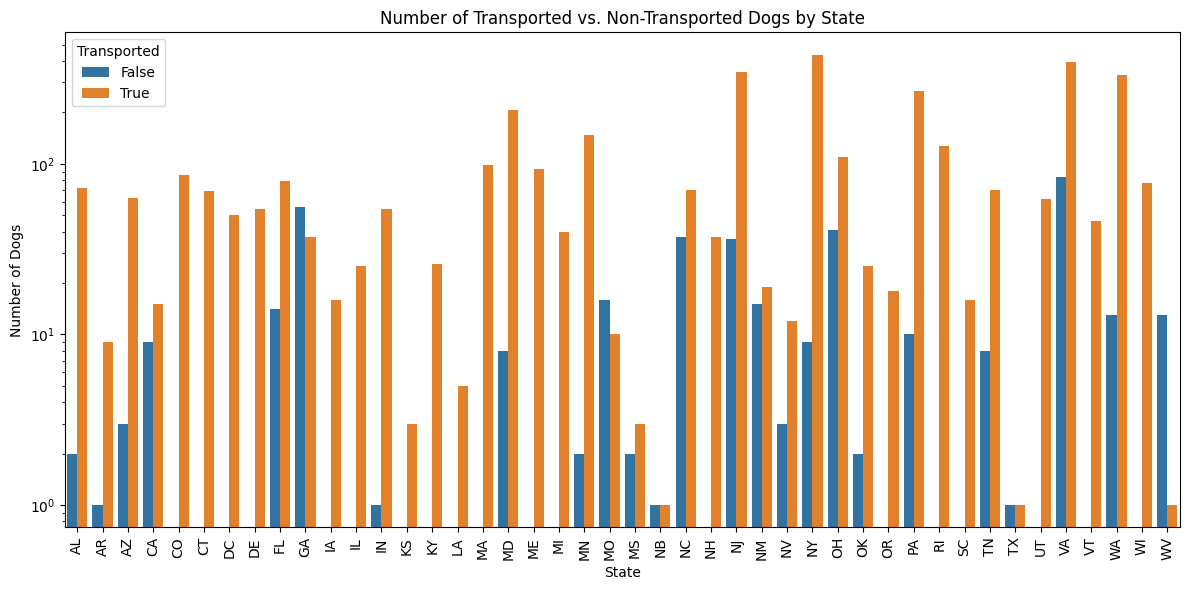

In [85]:
# Group data by contact_state and transported, then count occurrences
state_transported_counts = merged_df.groupby(['contact_state', 'transported'])["id"].count().reset_index()

# Rename the 'id' column to 'count'
state_transported_counts.rename(columns={'id': 'count'}, inplace=True)

# Create bar chart
plt.figure(figsize=(12, 6))  # Adjust width & height
sns.barplot(x="contact_state", y="count", hue="transported", data=state_transported_counts)
plt.title("Number of Transported vs. Non-Transported Dogs by State")
plt.xlabel("State")
plt.ylabel("Number of Dogs")
plt.yscale("log")        # improve visibility of blue bars
plt.xticks(rotation=90)
plt.legend(title="Transported")
plt.tight_layout()
plt.show()

There are more dogs up for adoption that are transported to different locations than dogs who were not. It seems as if NY, OH, PA, VT, ant WA are hotspot location hotspots for dogs who need a new home.

2. Use a line chart to find trends of dog postings based on breed over time.

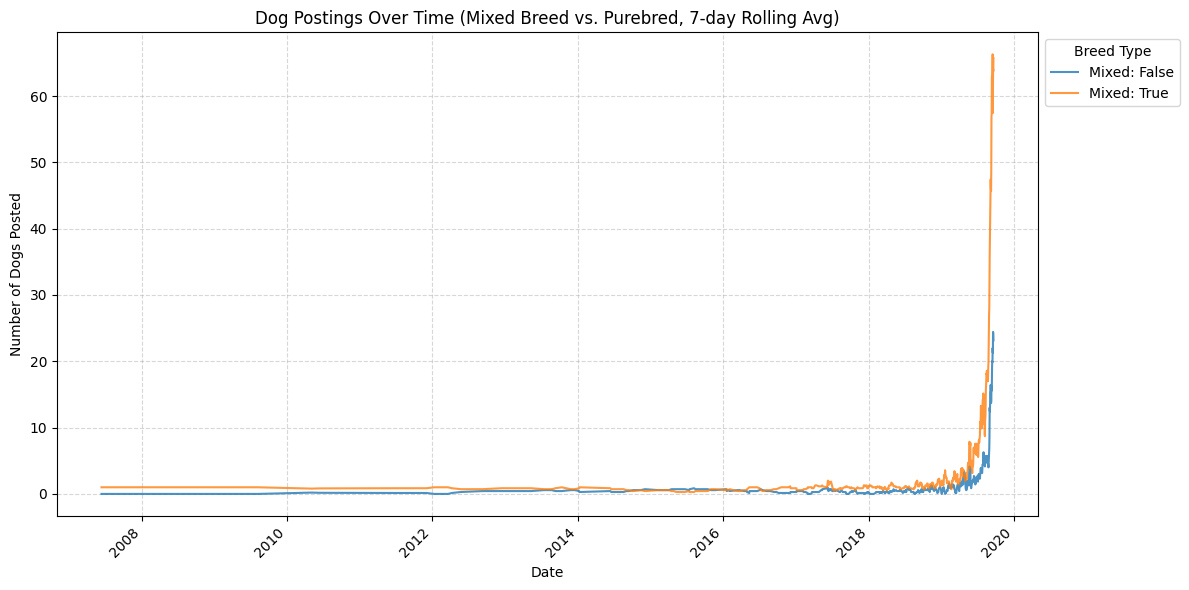

In [86]:
import matplotlib.pyplot as plt

# Group by date and breed_mixed (True/False), counting the number of postings
time_series_mixed = merged_df.groupby([merged_df["posted"].dt.date, "breed_mixed"]).size().unstack(fill_value=0)

# Apply a rolling average: 7-day window
time_series_smoothed = time_series_mixed.rolling(window=7, min_periods=1).mean()

# Plot the time series
plt.figure(figsize=(12, 6))
for category in time_series_smoothed.columns:
    plt.plot(time_series_smoothed.index, time_series_smoothed[category], label=f"Mixed: {category}", alpha=0.8)
plt.xlabel("Date")
plt.ylabel("Number of Dogs Posted")
plt.title("Dog Postings Over Time (Mixed Breed vs. Purebred, 7-day Rolling Avg)")
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Breed Type", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


There are more mixed breeds than pure breeds from 2019 to 2020. It seems that the timelines of postings are skewed to more recent postings in 2020.

3. Use a heatmap to determine if there is any correlation between the fixed, shots_current and house_trained attributes

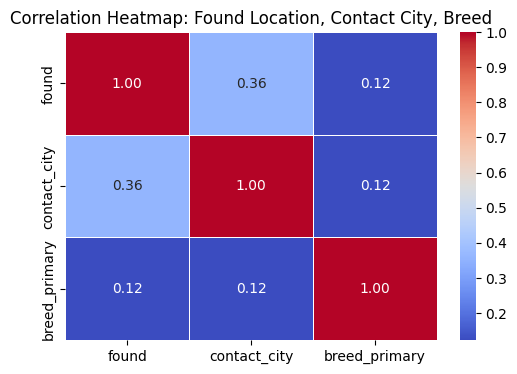

In [87]:
# Select relevant columns
selected_columns = ["found", "contact_city", "breed_primary"]

# Convert categorical variables to numerical codes
encoded_df = merged_df[selected_columns].apply(lambda x: pd.factorize(x)[0])

# Compute correlation matrix
corr_matrix = encoded_df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Found Location, Contact City, Breed")
plt.show()


There is no strong correlation between the different locations and the breed of adoptble dogs. However, there is correlation between the location where the dog was found and where it is up for adoption.

4. Use a stacked bar chart to compare breed_primary and house_trained attributes to determine if there is any trends on breeds vs. behavioral issues that may make them less desirable. To ensure there is no bias, check the dominant age groups within each breed.

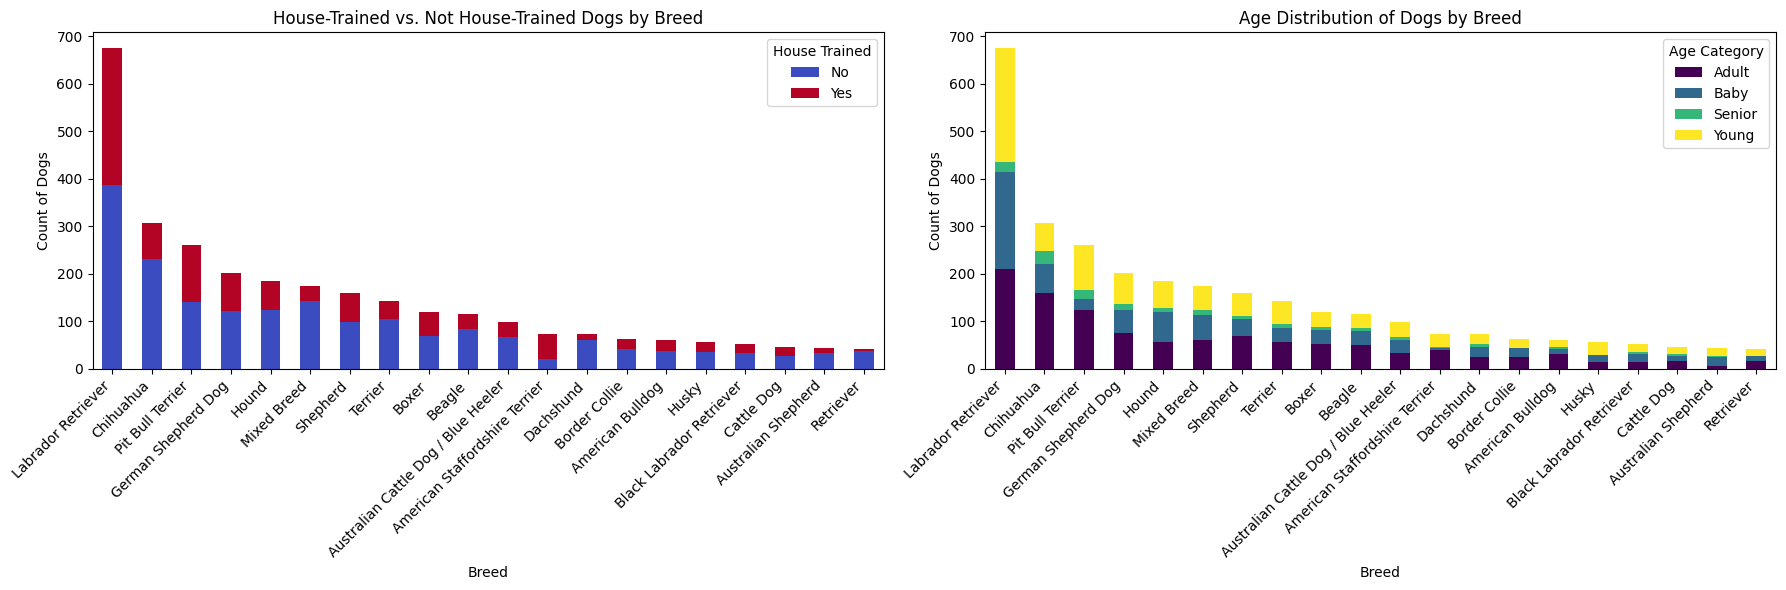

In [88]:
# Group by breed and house-trained status
grouped_data = merged_df.groupby(["breed_primary", "house_trained"]).size().unstack(fill_value=0)

# Group by breed and age
age_data = merged_df.groupby(["breed_primary", "age"]).size().unstack(fill_value=0)

# Select top 20 breeds
top_breeds = merged_df["breed_primary"].value_counts().head(20).index
filtered_house_trained = grouped_data.loc[top_breeds]
filtered_age = age_data.loc[top_breeds]

# Create figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Stacked bar chart: House-Trained vs. Not House-Trained
filtered_house_trained.plot(
    kind="bar",
    stacked=True,
    colormap="coolwarm",
    ax=axes[0]
)
axes[0].set_title("House-Trained vs. Not House-Trained Dogs by Breed")
axes[0].set_xlabel("Breed")
axes[0].set_ylabel("Count of Dogs")
axes[0].set_xticklabels(top_breeds, rotation=45, ha="right")
axes[0].legend(title="House Trained", labels=["No", "Yes"])

# Stacked bar chart: Age distribution within breeds
filtered_age.plot(
    kind="bar",
    stacked=True,
    colormap="viridis",
    ax=axes[1]
)
axes[1].set_title("Age Distribution of Dogs by Breed")
axes[1].set_xlabel("Breed")
axes[1].set_ylabel("Count of Dogs")
axes[1].set_xticklabels(top_breeds, rotation=45, ha="right")
axes[1].legend(title="Age Category")


plt.tight_layout()
plt.show()


This left visualization confirms that labs are the most common dog posted for adoption. Labs also have the biggest proportion of housetrained dogs besides the american staffordshire terrior while the retriever, australian shepherd, clattle dog, and sachshunds have the least proportions of housetrained dogs.

Additionally, the right visualization confirms that young and adult age groups take the highest proportion of the datasets. Looking at the retrievers, australian shepherds, cattle dogs, and daschunds consists of a decent proportion of puppies which may explain the higher proportions of unhouse-trained dogs. However, labs, gernan shepherds, chihuahuas also have decent of proportions of puppies.

It is important to note that the anerican staffordshire terrior has very little proportions of puppies and high proportions of housetrained dogs.

5. Finally, we will determine if there is any correlation between age of dogs and whether they are house trained.

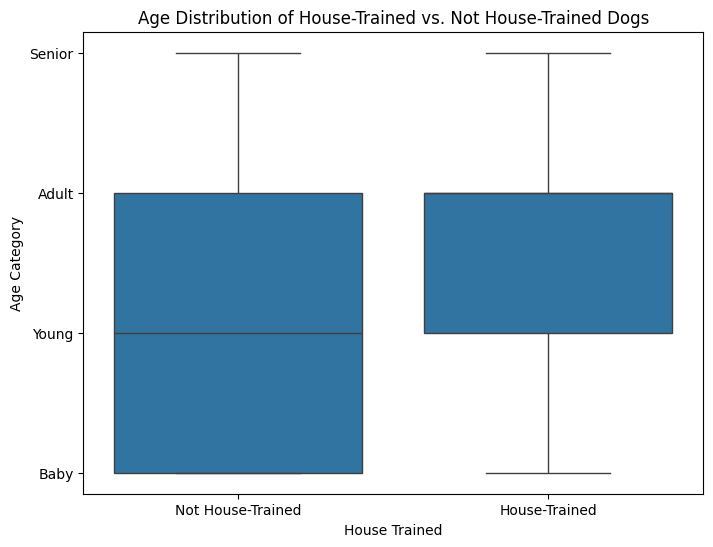

In [89]:
# Define numerical mapping for age categories
age_mapping = {"Baby": 0, "Young": 1, "Adult": 2, "Senior": 3}
merged_df["age_numeric"] = merged_df["age"].map(age_mapping)

# Create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x="house_trained", y="age_numeric", data=merged_df, showfliers=False)
plt.xticks([0, 1], ["Not House-Trained", "House-Trained"])  # Rename x-axis labels
plt.yticks(ticks=[0, 1, 2, 3], labels=["Baby", "Young", "Adult", "Senior"])  # Rename y-axis labels
plt.xlabel("House Trained")
plt.ylabel("Age Category")
plt.title("Age Distribution of House-Trained vs. Not House-Trained Dogs")
plt.show()

# Show the plot
plt.show()

This visualization confirms that the more puppies take up dog breeds, the less likely they will be potty-trained.

6. Determine if there is a trend of labs, the most dominant dog breed, and locations, to determine if there is a hidden pattern to why this is the case.

<Figure size 1200x600 with 0 Axes>

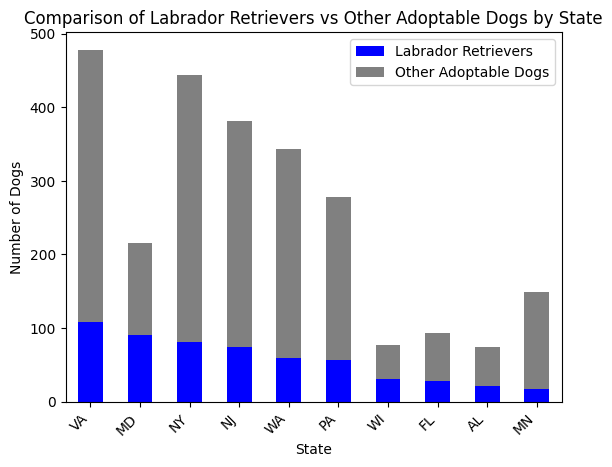

In [90]:
import matplotlib.pyplot as plt
import pandas as pd

# Count the number of Labrador Retrievers in each state
labs_state_counts = merged_df[merged_df['breed_primary'].str.contains('Labrador Retriever', case=False, na=False)]['contact_state'].value_counts()

# Count the total number of adoptable dogs in each state
total_dogs_state_counts = merged_df['contact_state'].value_counts()

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Labrador Retrievers': labs_state_counts,
    'Other Adoptable Dogs': total_dogs_state_counts - labs_state_counts
}).fillna(0)

# Select top 10 states with the most total adoptable dogs
top_10_states = comparison_df.nlargest(10, 'Labrador Retrievers')

# plot stacked bar chart
plt.figure(figsize=(12, 6))
top_10_states.plot(kind='bar', stacked=True, color=['blue', 'gray'])
plt.title('Comparison of Labrador Retrievers vs Other Adoptable Dogs by State')
plt.xlabel('State')
plt.ylabel('Number of Dogs')
plt.xticks(rotation=45, ha='right')
plt.legend(['Labrador Retrievers', 'Other Adoptable Dogs'])
plt.show()


Even though there is less labs compared to the total number of other breeds up for adoption in each state, they make up a popular proportion of adoptable dogs. This displays their popularity across the US.

### Conclusion

Through this data exploration, I examined various features that may influence a dog's likelihood of adoption, including breed, age, house-training status, current location, and whether the dog was transported. While the dataset only contains useful information on currently adoptable dogs, making it impossible to directly measure time spent in a shelter before adoption, several key insights emerged:

- **Breed distribution:** skewed towards labs due to being a popular breed across US.

- **Time series bias:** adoption listings are concentrated in year 2020 making it hard to capture trends.

- **Trends in dog characteristics:** Puppies tend to not be house-trained

- **Transport trends:** Majority of the adoptable dogs were transported to a new location suggesting that relocation is a factor in adoptions.

In [ ]:
!pip install nbconvert
# You also need to install latex-related package in order to convert a notebook to pdf file.
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc


In [92]:
#Finally, run this code to convert, and you should see it in the given folder of this colab.
!cp drive/MyDrive/Colab\ Notebooks/dog_adoption_location_trends.ipynb ./
!jupyter nbconvert --to pdf dog_adoption_location_trends.ipynb

[NbConvertApp] Converting notebook dog_adoption_location_trends.ipynb to pdf
[NbConvertApp] Support files will be in dog_adoption_location_trends_files/
[NbConvertApp] Making directory ./dog_adoption_location_trends_files
[NbConvertApp] Writing 171388 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 393669 bytes to dog_adoption_location_trends.pdf
